# Introduction

This document has the objective of making an exploratory data analysis of a provided dataset, by observing its basic characteristics, applying data preparation methods, and using the Principal Component Analysis (PCA) method in order to reduce its dimension and, therefore, the complexity of the analysis, without, nonetheless, changing its effectiveness. Additionally, the report also aims to delineate what is the Curse of Dimensionality.

The dataset is a subset, selected by experts, of available data collected from heavy Scania trucks in everyday usage and focuses on the Air Pressure System (APS), which generates pressurized air that is utilized in various functions in the vehicles. The dependable variable, which will be the central object of the analyse, in this scenario, is the "class", which can be positive or negative, depending on the variables. The positive class consists of component failures for a specific component of the APS. On the other hand, the negative class consists of trucks with failures for components not related to the APS. Furthermore, there is no detailed explanation of the meaning of features due to the privacy of the data.

# Importing libraries and dataset

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
from numpy import count_nonzero
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as preproc
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from scipy import sparse

In order to perform the following analysis using Python language, at Jupyter Notebooks, the subsequent libraries were imported: Pandas, Numpy, Matplotlib.pyplot, Seaborn, and Scikit-learn. 

Pandas is an open-source Python package, also known as a library, widely used for cleaning, exploring, manipulating, analysing, and understanding data. According to its own definition, it is "a fast, powerful, flexible and easy to use open-source data analysis and manipulation tool, built on top of the Python programming language” (The Pandas development team (2022o).

Numpy, which stands for Numerical Python, is mainly used to work with arrays through a number of mathematical functions and operations, such as logical, algebraic, trigonometric, basic statistical operations, and much more. In its own definition, Numpy refers to itself as a fundamental package for scientific computing, providing the possibility to work with multidimensional array objects and offering a vast number of operations to work with them (Numpy developers, 2022). From Numpy, the specific function "count_nonzero" is also imported to help with the calculation of the sparsity of the dataset.

With Matplotlib.pyplot, it is possible to create different types of plots, such as histograms or scatterplots, to help visualising the data in the most appropriate way, according to the selected features. "Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible" (The Matplotlib development team, 2022a). The specific module or API pyplot, in this case, is the one that contains functions to produce different types of 2D plots. "Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc" (The Matplotlib development team, 2022b).

Another library that was imported for this analysis was Seaborn. Similarly to Matbplotlib, and indeed based on it, Seaborn is used to creating graphs that help with data visualisation. Waskom (2021) defines Seaborn as “a Python data visualisation library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics”.

A question may arise at this point: why use two libraries that are this similar? Seaborn has all the necessary tools for fundamental data visualisation purposes, such as visualising distribution, trends, and relationships between variables in graph forms. In addition, when compared to Matplotlib, Seaborn is much simpler to code and has more refined aesthetics. When it comes to a high-complexity level of plotting graphs, Matplotlib can deliver more than Seaborn. "Seaborn is a clear winner at the beginning due to its syntax simplicity and aesthetics. But with complexity, Matplotlib flexes its muscles" (Alam, 2021).

The graph below, extracted from the same article cited above, pictures this comparison in a very comprehensible way, as shown below.

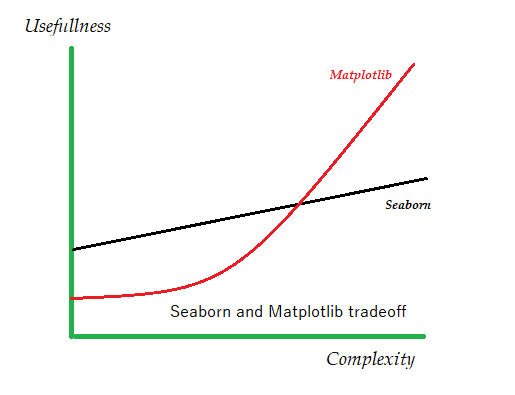
<i><center>Figure 1. The tradeoff between Seaborn and Matplotlib (© Alam)<i><center>

That said, it is worth mentioning that, in regards to this present analysis, both libraries will be used as a form of practicing, experimenting, and comparing the possible outcomes.

Following the sequence, some items were imported from Scikit-learn library: the module preprocessing and its function MinMaxScaler, and the function PCA from the module decomposition.

Scikit-learn is a machine learning library built on Numpy, Scipy, and Matplotlib. It is broadly described as a library of "simple and efficient tools for predictive data analysis" (Scikit-learn developers, 2022a). The MinMaxSacaler is one of the functions used to normalize the scale of the dataset. The decomposition module regards, chiefly, to dimensionality reduction techniques and includes matrix decomposition algorithms like the PCA.

After importing the libraries, the first step is to use Pandas to read the dataset. As the dataset is a CSV file, the function called is "pd.read_csv". The "na_values" parameter is required to make it possible, for example, to print the function "describe" for the whole dataset. If this parameter is not included, the "describe" outputs will only be printed for the first column of the dataset.

In this case, a list of possible missing values formats is created prior to reading the dataset and stored in the variable "missing_value_formats". The variable is, then used as the parameter aiming to recognize the observations with these different formats of input as a missing value. According to The Pandas development team (2022l), the "na_values" parameter is used to recognize additional strings not included in the default list as NA/NaN.

Additionally, the dataset will be assigned to the variable "df", short for dataframe.

In [2]:
# Reading the dataset

missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
df = pd.read_csv("aps_failure_set.csv", na_values = missing_value_formats)

# Becoming acquainted with the dataset

Two possible ways of revealing the shape of the dataframe are shown in the following lines of code. The function "shape", applied first, is the quickest one and prints the number of rows and columns, in this order. "DataFrame.shape" is used to "return a tuple representing the dimensionality of the DataFrame" (The Pandas development team, 2022j). 

In the second option, a longer code is used to bring the same result but in an easier way to be read by a client in a professional environment, for example. The first line of the code prints the length of the dataframe, as in the number of rows, and the second one prints the length of the columns.

The function "len" "computes the length of each element in the Series/Index. The element may be a sequence (such as a string, tuple or list) or a collection (such as a dictionary)" (The Pandas development team, 2022m).

In [3]:
# Discovering the shape of the dataset

df.shape

(60000, 171)

In [4]:
# Another method to discover the shape of the dataset

print("Number of rows: ", len(df))
print("Number of columns: ", len(list(df.columns)))

Number of rows:  60000
Number of columns:  171


Following the process of becoming acquainted with the dataset, the function "info" is applied. "This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage" (The Pandas development team, 2022h).

In [5]:
# Obtaining basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


As seen above, the outcome is not showing the columns as it would do with a smaller dataset. This happens because there is a maximum limit of 100 columns to display as default.

The parameter "verbose" uses the "max_info_columns" setting to decide whether per column information will be displayed or not (The Pandas development team, 2022a).

If setting the parameter "verbose" to true, the label and Dtype of the columns will be printed. However, in order to display even more information and obtain a more complete summary of the dataset, it is possible to set the "max_info_columns" to the total of 171 and, then, call the function "info" again. In this case, the information of non-null count appears, showing the number of observations available in each column, which is not marked as a missing value.

In [6]:
# Obtaining basic information about the dataset with columns details

df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 171 columns):
 #    Column  Dtype  
---   ------  -----  
 0    class   object 
 1    aa_000  int64  
 2    ab_000  float64
 3    ac_000  float64
 4    ad_000  float64
 5    ae_000  float64
 6    af_000  float64
 7    ag_000  float64
 8    ag_001  float64
 9    ag_002  float64
 10   ag_003  float64
 11   ag_004  float64
 12   ag_005  float64
 13   ag_006  float64
 14   ag_007  float64
 15   ag_008  float64
 16   ag_009  float64
 17   ah_000  float64
 18   ai_000  float64
 19   aj_000  float64
 20   ak_000  float64
 21   al_000  float64
 22   am_0    float64
 23   an_000  float64
 24   ao_000  float64
 25   ap_000  float64
 26   aq_000  float64
 27   ar_000  float64
 28   as_000  float64
 29   at_000  float64
 30   au_000  float64
 31   av_000  float64
 32   ax_000  float64
 33   ay_000  float64
 34   ay_001  float64
 35   ay_002  float64
 36   ay_003  float64
 37   ay_004  float64
 38   ay_0

In [7]:
# Another method of obtaining basic information about the dataset with even more columns details

pd.options.display.max_info_columns = 171
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 171 columns):
 #    Column  Non-Null Count  Dtype  
---   ------  --------------  -----  
 0    class   60000 non-null  object 
 1    aa_000  60000 non-null  int64  
 2    ab_000  13671 non-null  float64
 3    ac_000  56665 non-null  float64
 4    ad_000  45139 non-null  float64
 5    ae_000  57500 non-null  float64
 6    af_000  57500 non-null  float64
 7    ag_000  59329 non-null  float64
 8    ag_001  59329 non-null  float64
 9    ag_002  59329 non-null  float64
 10   ag_003  59329 non-null  float64
 11   ag_004  59329 non-null  float64
 12   ag_005  59329 non-null  float64
 13   ag_006  59329 non-null  float64
 14   ag_007  59329 non-null  float64
 15   ag_008  59329 non-null  float64
 16   ag_009  59329 non-null  float64
 17   ah_000  59355 non-null  float64
 18   ai_000  59371 non-null  float64
 19   aj_000  59371 non-null  float64
 20   ak_000  55600 non-null  float64
 21   al_000  59

The next Pandas function to be applied is the "head". This function "returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it" (The Pandas development team, 2022f).

By default, it shows the first five rows of observations. The amount can be altered by typing the desired one inside the parentheses.

After printing the head of the dataset, it is possible to see that the labels of the features are non-descriptive. They could be renamed to be self-explanatory, for example. However, with the lack of information provided about them, they will remain as they are originally.

In [8]:
# Observing a sample of the dataframe

df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


The last function applied in the dataframe in this section is the Pandas function "describe". It explores another type of summary of the dataset, showing the following values for each variable: count, mean, std, min, 25%, 50%, 75%, and max.

The "describe" function summarizes the following basic descriptive statistics for each column: central tendency, dispersion and shape of a dataset’s distribution (The Pandas development team, 2022c).

In [9]:
# Obtaining a summary of the dataset basic statistics

df.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


Finally, the dependent variable "class" will be explored to see the proportions of the entries "pos" and "neg". First, the function "value_counts" shows the count of each entry. It "returns a Series containing counts of unique values" (The Pandas development team, 2022n).

In [10]:
#Counting the values in the feature "class"

df["class"].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

A histogram of the same count is plotted to have a better visualisation of its distribution. Though the function is called through the Pandas library, it comes from the Matplotlib one. "A histogram is a representation of the distribution of data. This function calls matplotlib.pyplot.hist(), on each series in the DataFrame, resulting in one histogram per column" (The Pandas development team, 2022g). 

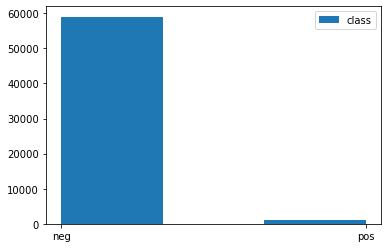

In [11]:
# Plotting a histogram of the feature "class"

df["class"].hist(grid = False, xlabelsize = 10, ylabelsize = 10, legend = "class", bins = 3);

The same function in Seaborn prints a slightly different graph with the same information.

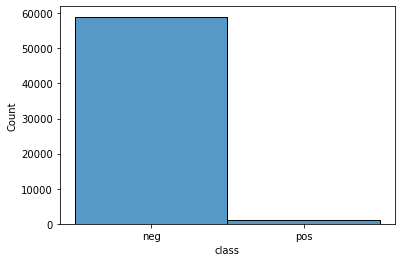

In [12]:
sns.histplot(data = df["class"], bins = 3);

Approximately 84% of the values in "class" are negative and only 16% of them show a positive relationship between the failures and components of the APS.

## Checking for duplicates

The code below is a sequence of two functions that sum up the total occurrences of duplicates.

The first one, "duplicated", returns a boolean Series denoting duplicate rows (The Pandas development team, 2022d). The second, "sum", returns the sum of all values over the requested axis (The Pandas development team, 2022k).

In [13]:
# Ckecking for duplicates

df.duplicated().sum()
print("There are a total of " + (str(df.duplicated().sum()) + " duplicates in the dataset."))

There are a total of 0 duplicates in the dataset.


While looking for duplicates, not one was found in the dataset. 

# Checking for missing values

Baweja, C. (2020) explains there are two types of missing values in a dataset. Blank cells and special symbols like NA (Not Available), NaN (Not a Number), etc are considered visible errors. Obscure errors are non-corrupt but invalid values, such as a negative salary or a number for a name, for instance.

Taking a look at the Dtype of the columns, it is easy to observe that 169 out of 171 columns have the Dtype float, while 1 has an integer Dtype and the other one follows the object Dtype. Though it is possible to see that the columns are chiefly numerical with no categorical values on them, it is still impossible to detect with 100% accuracy the presence of obscure errors, like a negative value in a feature that should be positive only, for instance. This can be explained due to the veiled characteristics of the dataset. Thus, the analysis is proceeding with the visible ones.

The "isnull" function is an alias for the function "isna" (The Pandas development team, 2022i). That means either of them will return the same outcome, as seen below.

Instead of applying only "isnull" in the dataset and obtaining a boolean same-sized object indicating if the values are NA, the functions "value" and "any" will be appended to indicate, in general, if there is any NA value.

The function "any" returns whether any element is True, potentially (The Pandas development team, 2022b).

Furthermore, the total of missing values is acquired by coding the function "sum" twice after the "isnull" or "isna". First, it counts the occurrences per column and then sums up all the individual results in a final one.

In [14]:
# Checking if there are any missing values - isnull

df.isnull().values.any()

True

In [15]:
# Checking if there are any missing values - isna

df.isna().values.any()

True

In [16]:
# Checking the total of missing values

df.isna().sum().sum()

850015

In [17]:
# Checking if there are any missing values in the column "class"

df["class"].isna().sum().sum()

0

It is possible to observe that while there is no missing value in the column "class", there is a fraction over 8% of missing values in the remaining 170 columns of the dataset.

To start handling the missing values, it is important to mention that there is no specific limit of missing values from which it is determined that an entire column should be dropped from the dataset, and opinions from experts may differ. 

"The proportion of missing data is directly related to the quality of statistical inferences. Yet, there is no established cutoff from the literature regarding an acceptable percentage of missing data in a data set for valid statistical inferences" (Dong and Peng, 2013).

"If data is missing for more than 60% of the observations, it may be wise to discard it if the variable is insignificant" (Master’s in Data Science, n.d.).

Firstly, the percentage of missing values in each column will be calculated and plotted in descending order, in an effort to see the features with the highest percentages of them. The calculation of this percentage is done by obtaining the sum of all "na" per column, then dividing this number by the total of entries - that can be accessed by using the function "shape" applied to the "axis 0", and finally multiplying this result by 100. The following part of the code, "to_frame", transform the previous result into a dataframe and, then, sort its values in descending order, i.e., from the highest to the lowest.

Secondly, a Matplotlib histogram is plotted showing the percentage of missing values per feature in descending order. The code defines the size of the plot as a figure and print labels for both axes, but exclude labels for each of the columns; as they are numerous, labels would not be legible and, at this point, they are not necessary.

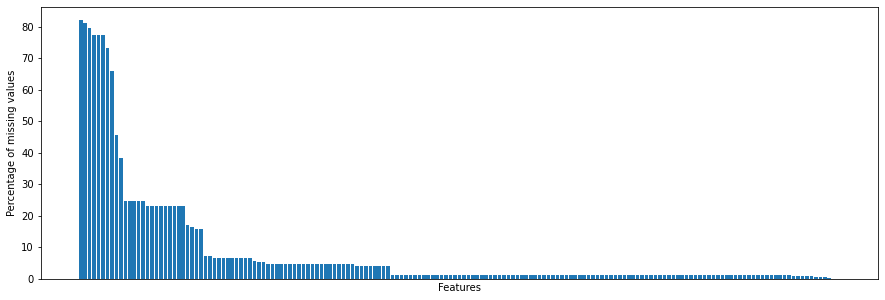

In [18]:
# calculating the percentage of missing values for each feature

df_na = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by = 0, ascending = False)

fig, ax = plt.subplots(figsize = (15,5))
ax.bar(df_na.index, df_na.values.T[0])
plt.xticks([])
plt.xlabel("Features")
plt.ylabel("Percentage of missing values")
plt.show()

The graph above shows that some columns have more than 60% of missing values. It is viable to check how many, exactly, they are.

The first line of the code below finds how many columns have more than 60% of missing values. In the second line, the result is transformed into a count of length and converted into a string to be printed as part of a sentence.

In [19]:
# Checking how many columns have more than 60% missing values

cols_na = df_na[df_na[0]>60]
print("There are " + str(len(cols_na)) + " columns with NaNs above 60%.")

There are 8 columns with NaNs above 60%.


While it is important to consider the variables themselves in the decisions, this analysis is being done in a dataset with a level of veiled information, as previously mentioned, which makes this impossible to be considered.

That said, the 8 columns with more than 60% of missing values will be dropped. Following, the columns to be dropped are printed as a list, and, then, the result of the dropping is reassigned to the variable "df", updating the dataframe, which has now 163 columns.

In [20]:
# Obtaining a list of the columns with more than 60% missing values

cols_to_drop = list(cols_na.index)
cols_to_drop

['br_000',
 'bq_000',
 'bp_000',
 'bo_000',
 'ab_000',
 'cr_000',
 'bn_000',
 'bm_000']

In [21]:
# Dropping the columns with more than 60% missing values

df = df.drop(columns = ["br_000", "bq_000", "bp_000", "bo_000", "ab_000", "cr_000", "bn_000", "bm_000"])
df

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [22]:
# Checking if there are any missing values in the dataset after dropping the columns with more than 60% missing values - isna

df.isna().values.any()

True

In [23]:
# Checking the total of missing values in the dataset after dropping the columns with more than 60% missing values - isna

df.isna().sum().sum()

481740

In order to verify that there are still other missing values in the updated dataset, the function "isna" was reapplied with "any" and "sum", and the results are as expected.

The actual count of missing values in the whole dataset is 481740 entries, around 5% of the actual dataset.

# Calculating the sparsity of the dataset

After continuing with the treatment of the missing value, the sparsity of the dataset might be analysed in order to define the next steps.

Though there is not a clear definition of what is the threshold from which a dataset or matrix is considered sparse, some say that roughly half of the observations or more than half of them should be zero for the dataset or matrix to be considered sparse.

Duff, Erisman and Reid (2017) say that "A matrix is sparse if many of its coefficients are zero", for instance. And the authors continue: "How much of the matrix must be zero for it to be considered sparse depends on the computation to be performed, the pattern of the nonzeros, and even the architecture of the computer."

With the Numpy function "count_nonzero" imported with the other libraries previously, we can calculate the sparsity of the data by subtracting this count of non-zero values from one, which represents the total observations, to obtain the count of zeroes. This result is, then, divided by the total of observations, appointed by the Pandas function "size".

In [24]:
# Calculating the sparsity of the data

sparsity = 1 - count_nonzero(df) / df.size
print("Sparsity of the dataframe is: " + str(sparsity) + ".")

Sparsity of the dataframe is: 0.3293770961145194.


Even though almost 33% is quite a high percentage, it is still fairly far from 50%. The Scipy "issparse" function will be applied next to confirm if the dataset is not considered sparse.

In [25]:
# Confirming if data is sparse

sparse.issparse(df)

False

# Scaling the data

Considering that the sparsity is a value considerably lower than 50% and the function "issparse" function returned false, the whole dataset cannot be considered sparse, which means it is dense.

The following step is to normalize the scale of the dataset before treating its outliers and applying any model. In this scenario of a dense dataset, either Standard Scaler or MinMaxScaler could be used, but because the Standard Scaler requires a normal distribution, the MinMaxScaler is the most appropriate instead.

MinMaxScaler "transforms features by scaling each feature to a given range" (Scikit-learn developers, 2022c). 

The scaler can only be applied in numerical features, so the variable "class" needs to be separated from the other features. So, "class" will be assigned to y and the others will be assigned to X.

In [26]:
# Assigning the independet variables to a new variable X

X = df.drop("class", axis = 1)

# Assigning the dependent variable to a new variable y

y = df["class"]

The scaler is then processed and fitted in X, which has its value reassigned to the new scaled values. The dataset is also reassigned as "df_scaled" and its values are printed as arrays.

In [27]:
scaler = preproc.MinMaxScaler()
X = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X)
df_scaled.values

array([[2.79250729e-02, 9.99999832e-01, 3.26176944e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.20361295e-02, 0.00000000e+00,            nan, ...,
        3.93692728e-04, 0.00000000e+00, 0.00000000e+00],
       [1.49423061e-02, 1.07006746e-07, 1.16491766e-08, ...,
        1.34905375e-04, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.07782233e-05, 9.99999829e-01, 2.09685178e-09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.92336170e-02, 9.99999829e-01, 5.75469322e-08, ...,
        1.01945944e-01, 0.00000000e+00, 0.00000000e+00],
       [1.46444794e-02, 3.27590826e-07, 7.31568288e-08, ...,
        4.14689673e-05, 0.00000000e+00, 0.00000000e+00]])

# Checking for outliers

After scaling the dataset, except for the column "class", it can be conferred if there are any outliers on it. For this to be done, the lower and upper limits will be calculated next. The limits are defined by the mean of each column, subtracted or added by the default value 1.5 multiplied by the respective standard deviation. "The number (here 1.5, hereinafter scale) clearly controls the sensitivity of the range and hence the decision rule. A bigger scale would make the outlier(s) to be considered as data point(s) while a smaller one would make some of the data point(s) to be perceived as outlier(s)" (Chaudhary, 2020).

Another way of proceeding with this calculation would be by using the interquartile range.

In [28]:
# Calculating the lower limit

lower_limit = df_scaled.mean() - 1.5 * df_scaled.std()
lower_limit

0     -0.057821
1     -0.392498
2     -0.007038
3     -0.011187
4     -0.015131
         ...   
157   -0.018781
158   -0.027795
159   -0.016487
160   -0.013408
161   -0.011373
Length: 162, dtype: float64

In [29]:
# Calculating the upper limit

upper_limit = df_scaled.mean() + 1.5 * df_scaled.std()
upper_limit

0      0.101029
1      0.726673
2      0.007082
3      0.011835
4      0.016228
         ...   
157    0.024572
158    0.042195
159    0.020891
160    0.013784
161    0.011744
Length: 162, dtype: float64

After calculating the limits, the dataset can be displayed showing only the outliers while the non-outliers are viewed, temporarily, as NaN.

In [30]:
# Displaying the outliers

display(df_scaled[~((df_scaled < upper_limit) & (df_scaled > lower_limit))])

,0,1,2,3,4,5,6,7,8,9,...,152,153,154,155,156,157,158,159,160,161
0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027923
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.046641,NaN,NaN,NaN
59996,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59997,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59998,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.101946,NaN,NaN


The outliers will, then, be selected and replaced with NaN, using the Numpy function "np.nan". And the sum of all NaN values is checked once more.

In [31]:
# Replacing the outliers with NaNs

df_scaled[df_scaled < lower_limit] = np.nan
df_scaled[df_scaled > upper_limit] = np.nan

In [32]:
# Checking the amount of null values in the dataset after removing outliers and leaving the observations null

df_scaled.isna().sum().sum()

692782

At this point, the total of missing values is increased to 692782, which represents, now, approximately 7% of the dataset.

# Filling all missing values

The next step is to fill in the missing values with the most appropriate method. In this case, they will be replaced with the median, to avoid any interference in the shape of the distribution.

While the mean is sensitive to every value, the median is not drastically affected by a few extreme values and, because of that, it is known as a resistant measure of centre. Triola (2012, p. 86) defines median as “the measure of centre that the middle value when the original data values are arranged in order of increasing (or decreasing) magnitude”. Triola, M.F. (2012). Elementary Statistics. International Edition ed. Boston: Pearson Education, Inc.

The median of the columns in "df_scaled" is assigned to the value "column_medians". Following, the function "fillna" is applied to "df_scaled", which has its value reassigned and, then, displayed.

The function "fillna" is responsible for filling NA/NaN values using a specific method, the median in this case (The Pandas development team, 2022e).

After this, it is possible to check that there are no missing values in the dataset anymore.

In [33]:
# Replacing the NaNs with median values

column_medians = df_scaled.median()
df_scaled = df_scaled.fillna(column_medians)
display(df_scaled)

,0,1,2,3,4,5,6,7,8,9,...,152,153,154,155,156,157,158,159,160,161
0,0.027925,3.473026e-08,3.261769e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,1.627842e-04,...,0.015918,0.013067,7.421784e-03,8.179508e-03,1.073013e-02,0.001321,0.003800,0.000000,0.000000,0.0
1,0.012036,0.000000e+00,1.467796e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,7.977081e-05,...,0.005407,0.004716,3.019031e-03,4.272917e-03,4.228511e-03,0.000679,0.005064,0.000394,0.000000,0.0
2,0.014942,1.070067e-07,1.164918e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,7.201835e-06,...,0.003559,0.004232,4.364196e-03,7.130884e-03,1.014768e-02,0.001321,0.004937,0.000135,0.000000,0.0
3,0.000004,3.285295e-08,7.688457e-09,0.0,0.000498,0.0,0.0,0.0,0.000005,9.666541e-06,...,0.000003,0.000001,5.970003e-07,7.660803e-07,3.163775e-07,0.000000,0.000000,0.000000,0.008299,0.0
4,0.022164,6.420405e-07,5.335323e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,1.911982e-04,...,0.007981,0.006086,4.171776e-03,6.044861e-03,9.078578e-03,0.002605,0.022523,0.000320,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.055707,3.116337e-07,2.166747e-08,0.0,0.000000,0.0,0.0,0.0,0.000040,2.582697e-04,...,0.012812,0.015013,1.328221e-02,2.121074e-02,3.226316e-02,0.006002,0.000137,0.007503,0.000000,0.0
59996,0.000832,3.473026e-08,2.609416e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,4.544847e-07,...,0.000136,0.000179,2.174522e-04,1.191324e-03,4.302733e-06,0.000000,0.000000,0.000000,0.000000,0.0
59997,0.000041,3.473026e-08,2.096852e-09,0.0,0.000000,0.0,0.0,0.0,0.000000,1.223613e-07,...,0.000010,0.000010,4.652485e-06,2.507172e-06,4.619111e-06,0.000022,0.000000,0.000000,0.000000,0.0
59998,0.029234,3.473026e-08,5.754693e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,1.442115e-06,...,0.008974,0.005897,3.575600e-03,3.930061e-03,6.151643e-03,0.001380,0.041639,0.000000,0.000000,0.0


In [34]:
# Confirming that there is no null values in the dataset after replacing them with medians

df_scaled.isna().sum().sum()

0

# Applying PCA

The Principal Component Analysis, called PCA, is used to reduce the dimensionality of the dataset to the minimum number of features as possible while maintaining the maximum variety, i.e., a more condensed dataset that will deliver the same results because it is focusing on its principal components.

"Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower-dimensional space. The input data is centered but not scaled for each feature before applying the SVD" (Scikit-learn developers, 2022b).

The scaler is activated, or called, to maintain 99.5% of the variance, in this case. Then, the dataset - still without the column "class", is fitted in the scaler. The plot below illustrates that the number of components necessary to achieve almost 100% of the cumulative variance is around 30.

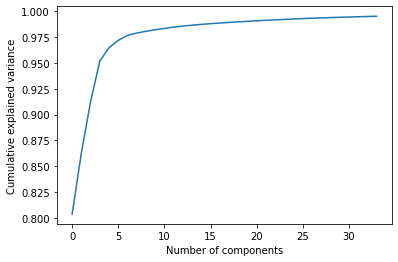

In [35]:
# Applying PCA to choose the minimum number of principal components such that 99,5% of the variance is retained

pca = PCA(0.995)
pca.fit(df_scaled) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel("Number of components") 
plt.ylabel("Cumulative explained variance"); 

The new dataset is projected and its new shape is 34 columns. Then, it is converted to a Pandas dataframe called "df_pca" and has its columns renamed.

In [36]:
# Projecting the new dataset and adding the column "class" back to it

projected = pca.fit_transform(df_scaled)
projected.shape

(60000, 34)

In [37]:
# Converting the new dataset to a dataframe and renaming the columns

df_pca = pd.DataFrame(projected, columns = ["C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "C10", "C11", "C12", "C13", "C14", "C15", "C16", "C17", "C18", "C19", "C20", "C21", "C22", "C23", "C24", "C25", "C26", "C27", "C28", "C29", "C30", "C31", "C32", "C33", "C34"])
display(df_pca)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34
0,0.381978,-0.089073,0.137210,0.010637,0.057561,-0.017508,-0.038228,0.010331,-0.016735,-0.001598,...,0.013458,-0.020029,0.019136,0.005336,0.003806,0.014557,-0.005117,-0.002509,-0.005638,0.009714
1,-0.224381,0.050526,0.180623,-0.032381,-0.033070,0.001566,-0.012479,-0.009840,-0.004815,-0.014345,...,0.002856,0.003680,-0.004772,0.004172,0.003944,0.001123,-0.001825,-0.001363,-0.000946,0.001098
2,-0.061179,0.022151,-0.065697,0.061365,-0.020714,0.005997,-0.014418,-0.000585,0.002970,0.007216,...,0.004015,0.003217,-0.000640,-0.003002,-0.002234,-0.000681,-0.000291,-0.000165,0.000770,-0.002271
3,-0.320269,0.012590,-0.019173,-0.030474,-0.010025,0.000947,0.006226,-0.001724,0.000688,-0.001802,...,0.000347,-0.000538,0.000002,-0.000412,0.000082,0.000081,0.000107,0.000046,-0.000007,-0.000031
4,0.427941,-0.024413,0.075702,-0.017921,0.075502,0.007733,-0.031699,0.003838,0.018591,-0.004057,...,-0.008434,0.001581,-0.001388,-0.005688,-0.004536,-0.010497,-0.001274,0.001446,-0.000872,-0.005960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-0.083309,-0.062689,0.131940,0.183863,-0.027617,0.023544,-0.017740,-0.004836,0.009590,-0.039670,...,-0.026914,-0.003737,0.002712,-0.021780,-0.003527,-0.000076,-0.012038,-0.001858,-0.005858,0.005951
59996,-0.173308,0.021086,-0.025893,-0.039264,-0.011897,0.001522,0.007670,-0.001328,0.001562,-0.001580,...,-0.000476,-0.000872,0.000088,-0.000743,-0.000486,0.000074,0.000028,0.000617,-0.000664,-0.000086
59997,-0.295142,0.014010,-0.020321,-0.032066,-0.009751,0.001021,0.006697,-0.001406,0.000369,-0.001908,...,0.000272,-0.000506,-0.000042,-0.000392,0.000164,0.000172,0.000169,0.000033,-0.000046,-0.000083
59998,-0.240077,-0.097206,0.146309,0.063673,-0.032610,-0.015502,-0.054719,-0.011614,-0.006552,-0.018736,...,-0.025253,-0.002975,0.000938,0.007222,0.001688,-0.009770,-0.001385,0.002635,-0.003572,0.014228


Finally, the column "class" is restored in the final dataset.

In [38]:
# Adding the column "class" back to the dataframe

df_pca["class"] = df["class"]
display(df_pca)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C26,C27,C28,C29,C30,C31,C32,C33,C34,class
0,0.381978,-0.089073,0.137210,0.010637,0.057561,-0.017508,-0.038228,0.010331,-0.016735,-0.001598,...,-0.020029,0.019136,0.005336,0.003806,0.014557,-0.005117,-0.002509,-0.005638,0.009714,neg
1,-0.224381,0.050526,0.180623,-0.032381,-0.033070,0.001566,-0.012479,-0.009840,-0.004815,-0.014345,...,0.003680,-0.004772,0.004172,0.003944,0.001123,-0.001825,-0.001363,-0.000946,0.001098,neg
2,-0.061179,0.022151,-0.065697,0.061365,-0.020714,0.005997,-0.014418,-0.000585,0.002970,0.007216,...,0.003217,-0.000640,-0.003002,-0.002234,-0.000681,-0.000291,-0.000165,0.000770,-0.002271,neg
3,-0.320269,0.012590,-0.019173,-0.030474,-0.010025,0.000947,0.006226,-0.001724,0.000688,-0.001802,...,-0.000538,0.000002,-0.000412,0.000082,0.000081,0.000107,0.000046,-0.000007,-0.000031,neg
4,0.427941,-0.024413,0.075702,-0.017921,0.075502,0.007733,-0.031699,0.003838,0.018591,-0.004057,...,0.001581,-0.001388,-0.005688,-0.004536,-0.010497,-0.001274,0.001446,-0.000872,-0.005960,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-0.083309,-0.062689,0.131940,0.183863,-0.027617,0.023544,-0.017740,-0.004836,0.009590,-0.039670,...,-0.003737,0.002712,-0.021780,-0.003527,-0.000076,-0.012038,-0.001858,-0.005858,0.005951,neg
59996,-0.173308,0.021086,-0.025893,-0.039264,-0.011897,0.001522,0.007670,-0.001328,0.001562,-0.001580,...,-0.000872,0.000088,-0.000743,-0.000486,0.000074,0.000028,0.000617,-0.000664,-0.000086,neg
59997,-0.295142,0.014010,-0.020321,-0.032066,-0.009751,0.001021,0.006697,-0.001406,0.000369,-0.001908,...,-0.000506,-0.000042,-0.000392,0.000164,0.000172,0.000169,0.000033,-0.000046,-0.000083,neg
59998,-0.240077,-0.097206,0.146309,0.063673,-0.032610,-0.015502,-0.054719,-0.011614,-0.006552,-0.018736,...,-0.002975,0.000938,0.007222,0.001688,-0.009770,-0.001385,0.002635,-0.003572,0.014228,neg


# The Curse of Dimensionality

It is the era of Big Data: massive volume and speed of information, generating extremely large datasets that are too complex even for data science and machine learning.

The Curse of Dimensionality, an expression coined by Richard E. Bellman in 1961, considers these large dimensions a problem. His theory explains that, while machine learning excels in processing and analysing data with many dimensions, there is a crucial threshold from where its size becomes a problem as it requires more power to be dealt with.

Two problems can arise from a large dataset. The first thing is that high-dimensional datasets face the risk of overfitting the model. The second thing is: the more features it has, the harder is to cluster them because the observations will tend to appear equidistant from the others.

Because of this, dimensionality reduction tools were developed with the objective to make the dataset smaller in size, by keeping its most valuable components in order to achieve its best performance point. In other words: the final product will be an effectively concise dataset.

# Conclusion

In this analysis, it was possible to learn that high-dimensional datasets make even the most basic exploratory analysis more difficult to be executed and interpreted. Thus, it is sine qua non to make use of a dimensionality reduction technique in order to provide a better analysis.

After using tools and techniques for cleaning the dataset and applying PCA to reduce its dimension such that 99,5% of the variance is retained, the dataset was resized to 34 features. It is still a considerably large dataset, yet suffered a reduction of 80% from its original size of 171 columns.

However, by observing the graph of the number of components across the cumulative explained variance, it is possible to see that if the percentage of variance is reduced to around 97,5%, only 2 points less than 99,5% yet more than 95%, the number of principal components would drop drastically to approximately 5. In the end, the chosen percentage is a decision that can be made by the data analyst and the client, based on their objectives.

# Reference list

Alam, M. (2021). Seaborn can do the job, then why Matplotlib? [online] Medium. Available at: https://towardsdatascience.com/seaborn-can-do-the-job-then-why-matplotlib-dac8d2d24a5f [Accessed 30 Mar. 2022].

Baweja, C. (2020). How to Deal with Missing Data in Python. [online] Medium. Available at: https://towardsdatascience.com/how-to-deal-with-missing-data-in-python-1f74a9112d93 [Accessed 30 Mar. 2022].

Chaudhary, S. (2020). Why ‘1.5’ in IQR Method of Outlier Detection? [online] Medium. Available at: https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097 [Accessed 1 Apr. 2022].

Dong, Y. and Peng, C.-Y.J. (2013). Principled missing data methods for researchers. SpringerPlus, [online] 2(1). Available at: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3701793/ [Accessed 30 Mar. 2022].

Duff, I.S., Erisman, A.M. and Reid, J.K. (2017). Direct methods for sparse matrices. New York: Oxford University Press.

Master’s in Data Science. (n.d.). How to Deal with Missing Data. [online] Available at: 
https://www.mastersindatascience.org/learning/how-to-deal-with-missing-data/ [Accessed 30 Mar. 2022].

Numpy developers (2022). What is NumPy? — NumPy v1.19 Manual. [online] numpy.org. Available at: https://numpy.org/doc/stable/user/whatisnumpy.html [Accessed 30 Mar. 2022].

Scikit-learn developers (2022a). scikit-learn: machine learning in Python — scikit-learn 0.20.3 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/ [Accessed 30 Mar. 2022].

Scikit-learn developers (2022b). sklearn.decomposition.PCA — scikit-learn 0.20.3 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html [Accessed 1 Apr. 2022].

Scikit-learn developers (2022c). sklearn.preprocessing.MinMaxScaler — scikit-learn 0.22.1 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html [Accessed 30 Mar. 2022].

The Matplotlib development team (2022a). Matplotlib documentation — Matplotlib 3.5.1 documentation. [online] matplotlib.org. Available at: https://matplotlib.org/3.5.1/index.html [Accessed 30 Mar. 2022].

The Matplotlib development team (2022b). Pyplot tutorial — Matplotlib 3.4.2 documentation. [online] matplotlib.org. Available at: https://matplotlib.org/stable/tutorials/introductory/pyplot.html [Accessed 30 Mar. 2022].

The Pandas development team (2022a). Options and settings — pandas 1.4.1 documentation. [online] pandas.pydata.org. Available at: https://pandas.pydata.org/docs/user_guide/options.html [Accessed 30 Mar. 2022].

The Pandas development team (2022b). pandas.DataFrame.any — pandas 1.4.1 documentation. [online] pandas.pydata.org. Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html [Accessed 30 Mar. 2022].

The Pandas development team (2022c). pandas.DataFrame.describe — pandas 1.3.4 documentation. [online] pandas.pydata.org. Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html [Accessed 30 Mar. 2022].

The Pandas development team (2022d). pandas.DataFrame.duplicated — pandas 1.4.1 documentation. [online] pandas.pydata.org. Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html [Accessed 30 Mar. 2022].

The Pandas development team (2022e). pandas.DataFrame.fillna — pandas 1.4.1 documentation. [online] pandas.pydata.org. Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html [Accessed 30 Mar. 2022].

The Pandas development team (2022f). pandas.DataFrame.head — pandas 1.3.4 documentation. [online] pandas.pydata.org. Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html [Accessed 30 Mar. 2022].

The Pandas development team (2022g). pandas.DataFrame.hist — pandas 1.2.4 documentation. [online] pandas.pydata.org. Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html [Accessed 30 Mar. 2022].

The Pandas development team (2022h). pandas.DataFrame.info — pandas 1.4.1 documentation. [online] pandas.pydata.org. Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html [Accessed 30 Mar. 2022].

The Pandas development team (2022i). pandas.DataFrame.isnull — pandas 1.2.4 documentation. [online] pandas.pydata.org. Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html [Accessed 30 Mar. 2022].

The Pandas development team (2022j). pandas.DataFrame.shape — pandas 1.5.0.dev0+629.ge610022ac9 documentation. [online] pandas.pydata.org. Available at: https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.DataFrame.shape.html [Accessed 30 Mar. 2022].

The Pandas development team (2022k). pandas.DataFrame.sum — pandas 1.4.1 documentation. [online] pandas.pydata.org. Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html [Accessed 30 Mar. 2022].

The Pandas development team (2022l). pandas.read_csv — pandas 1.2.4 documentation. [online] pandas.pydata.org. Available at: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html [Accessed 30 Mar. 2022].

The Pandas development team (2022m). pandas.Series.str.len — pandas 1.4.1 documentation. [online] pandas.pydata.org. Available at: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.len.html [Accessed 30 Mar. 2022].

The Pandas development team (2022n). pandas.Series.value_counts — pandas 1.3.4 documentation. [online] pandas.pydata.org. Available at: https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html [Accessed 30 Mar. 2022].

The Pandas development team (2022o). Python Data Analysis Library — pandas: Python Data Analysis Library. [online] Pydata.org. Available at: https://pandas.pydata.org/ [Accessed 30 Mar. 2022].

Triola, M.F. (2012). Elementary Statistics. Iternational Edition ed. Boston: Pearson Education, Inc.

Waskom, M. (2021). seaborn: statistical data visualization — seaborn 0.9.0 documentation. [online] Pydata.org. Available at: https://seaborn.pydata.org/ [Accessed 30 Mar. 2022].